# EMAIL SPAM DETECTION

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam.

# Importing the Libraries

In [653]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [654]:
!pip install chardet

In [655]:
import chardet
with open('/content/spam.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

# Load the Data Set

In [656]:
email = pd.read_csv('/content/spam.csv', encoding=encoding)
email.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [657]:
email.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [658]:
# Display number of samples on each class
email['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [659]:
# checking the number of rows, columns
email.shape

(5572, 5)

In [660]:
# rename columns names
email.rename(columns={"v1":"Category", "v2":"Message"}, inplace=True)
email

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [661]:
# To display the  concise summary of the data set.
print("display the information about the data set ")
email.info()

# To display the descriptive stats about data
print("display the statistics of the data set ")
email.describe()

display the information about the data set 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    5572 non-null   object
 1   Message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
display the statistics of the data set 


,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


# Label Encoding
To convert categorical columns into numerical values so that they can be used in machine learning models which only take numerical data.

**Here we are converting 'Category' column data to Numeric data.**

**Ham = 0 | spam = 1**

In [662]:
#Before converting
email.head()

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [663]:
#After converting
# Category - Ham = 0 | spam = 1
print("Converting Category - spam and ham")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
email['Category'] = le.fit_transform(email["Category"])
email.head()

Converting Category - spam and ham


,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [664]:
# To display the number of missing values in each column
print("Number of missing values in each column:")
print(email.isnull().sum())

Number of missing values in each column:
Category         0
Message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [665]:
# To display duplicated values
email.duplicated().sum()
email[email.duplicated()]

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
102,0,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
153,0,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
206,0,"As I entered my cabin my PA said, '' Happy B'd...",NaN,NaN,NaN
222,0,"Sorry, I'll call later",NaN,NaN,NaN
325,0,No calls..messages..missed calls,NaN,NaN,NaN
...,...,...,...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN
5535,0,"I know you are thinkin malaria. But relax, chi...",NaN,NaN,NaN
5539,0,Just sleeping..and surfing,NaN,NaN,NaN
5553,0,Hahaha..use your brain dear,NaN,NaN,NaN


In [666]:
#Drop duplicated values
df = email.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [667]:
email

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [668]:
#Droping the Unnamed columns (2, 3, 4)
email.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)

In [669]:
d1 = pd.notnull(email)
d1.head(10)

,Category,Message
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


In [670]:
d2 = email.where(d1,'')
d2.head(10)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [671]:
#converting the Message column to lowercase
email['Message'] = email['Message'].str.lower()
email

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [672]:
import re
# Define the regular expression pattern
pattern = r'[^\w\s]'
# Use regular expressions to remove special characters from the 'Message' column
email['Message'] = email['Message'].replace(pattern, '', regex=True)
email

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


# Data Visualisation

(-1.0999999238594995,
 1.099999996374262,
 -1.099999969050372,
 1.0999998321324709)

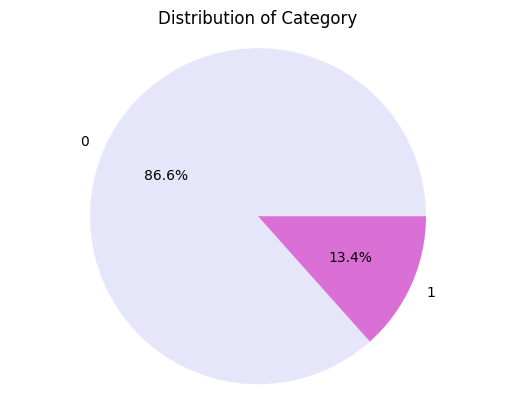

In [673]:
target = email['Category'].value_counts()
plt.pie(target,labels=target.index,autopct='%1.1f%%',colors=['lavender', 'orchid'])
plt.title('Distribution of Category')
plt.axis('equal')

# Machine Learning  




# Naive Bayes Classification

In [674]:
email

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [675]:
#transform/ Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tv = TfidfVectorizer(stop_words = 'english')
xtv = tv.fit_transform(email['Message'])
xtc = cv.fit_transform(email['Message'])

In [676]:
d1 = xtc.toarray()

In [677]:
from sklearn.model_selection import train_test_split
Y = email['Category']
x_train, x_test, y_train, y_test = train_test_split(d1, Y, test_size=0.30)

In [678]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [679]:
# To make Predictions
pd1 = gnb.predict(x_test)

In [680]:
from sklearn.metrics import r2_score
s = r2_score(y_test, pd1)
print("The accuracy of GaussianNB model is {}%".format(round(s, 2) *100))

The accuracy of GaussianNB model is 16.0%


In [681]:
#To Evaluate Model's Performance/Accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, pd1))
print('Mean Squared Error:', mean_squared_error(y_test, pd1))
score = np.sqrt(mean_squared_error(y_test, pd1))
print('Mean Root Squared Error:',score)

Mean Absolute Error: 0.09629186602870814
Mean Squared Error: 0.09629186602870814
Mean Root Squared Error: 0.3103093070288227


In [682]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [683]:
# To make Predictions
pd2 = mnb.predict(x_test)

In [684]:
from sklearn.metrics import r2_score
s = r2_score(y_test, pd2)
print("The accuracy of MultinomialNB model is {}%".format(round(s, 2) *100))

The accuracy of MultinomialNB model is 83.0%


In [685]:
#To Evaluate Model's Performance/Accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, pd2))
print('Mean Squared Error:', mean_squared_error(y_test, pd2))
score = np.sqrt(mean_squared_error(y_test, pd2))
print('Mean Root Squared Error:',score)

Mean Absolute Error: 0.019138755980861243
Mean Squared Error: 0.019138755980861243
Mean Root Squared Error: 0.13834289277321493


In [686]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [687]:
# To make Predictions
pd3 = bnb.predict(x_test)

In [688]:
from sklearn.metrics import r2_score
s = r2_score(y_test, pd3)
print("The accuracy of BernoulliNB model is {}%".format(round(s, 2) *100))

The accuracy of BernoulliNB model is 77.0%


In [689]:
#To Evaluate Model's Performance/Accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, pd3))
print('Mean Squared Error:', mean_squared_error(y_test, pd3))
score = np.sqrt(mean_squared_error(y_test, pd3))
print('Mean Root Squared Error:',score)

Mean Absolute Error: 0.02631578947368421
Mean Squared Error: 0.02631578947368421
Mean Root Squared Error: 0.16222142113076254
